# Clustering Toronto Destinations Code
An Applied Data Science Capstone Project
by Morales, J. 2020

### Preliminaries and data preparation involves
- Setting up libraries needed
- Scraping online source Wikipedia for Toronto neighbourhoods information including Borough, Postal Code, and Neighbourhood
- Creating a dataframe out of the scraped source
- Cleaning up missing values, i.e., 'Not Assigned' values in the Borough column

In [26]:
# Set-up libraries
from bs4 import BeautifulSoup
import requests
from IPython.display import display_html
import pandas as pd
import numpy as np
import folium
from geopy.geocoders import Nominatim
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

In [3]:
# Scrape wiki source
path = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
source = requests.get(path).text
soup = BeautifulSoup(source, 'lxml')
print(soup.title)
toronto_table = str(soup.table)
display_html(toronto_table, raw=True)

<title>List of postal codes of Canada: M - Wikipedia</title>


Postcode,Borough,Neighbourhood
M1A,Not assigned,Not assigned
M2A,Not assigned,Not assigned
M3A,North York,Parkwoods
M4A,North York,Victoria Village
M5A,Downtown Toronto,Harbourfront
M6A,North York,Lawrence Heights
M6A,North York,Lawrence Manor
M7A,Downtown Toronto,Queen's Park
M8A,Not assigned,Not assigned
M9A,Etobicoke,Islington Avenue


In [4]:
# Read-in source to dataframe
toronto_dfs = pd.read_html(toronto_table)
toronto_df = toronto_dfs[0]
toronto_df.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [5]:
# Discard the rows with 'Not assigned' value in Borough column   
toronto_df1 = toronto_df[toronto_df.Borough != 'Not assigned']

# Join neighbourhoods with identical Postcode values
toronto_df2 = toronto_df1.groupby(['Postcode', 'Borough'], sort=False).agg(', '.join)
toronto_df2.reset_index(inplace=True)

# Impute 'Not assigned' in Neighbourhood with Borough names
toronto_df2['Neighbourhood'] = np.where(toronto_df2['Neighbourhood'] == 'Not assigned', 
                                toronto_df2['Borough'], 
                                toronto_df2['Neighbourhood'])
toronto_df2.head()

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,"Lawrence Heights, Lawrence Manor"
4,M7A,Downtown Toronto,Queen's Park


In [6]:
toronto_df2.shape

(103, 3)

In [7]:
# Read-in coordinates to dataframe
geo_loc_df = pd.read_csv('Geospatial_Coordinates.csv')
geo_loc_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [8]:
toronto_df3 = pd.merge(toronto_df2, geo_loc_df, left_on='Postcode', right_on='Postal Code')
toronto_df3.drop(columns=['Postal Code'], inplace=True)
toronto_df3.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763
4,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494


### Visual exploratoration involves
A look at Toronto overall
- Get Toronto geographical coordinates
- Visualise Toronto and its neighbourhoods

A look at just the boroughs with the string 'Toronto'
- Get Toronto geographical coordinates of downtown Toronto
- Visualise downtown Toronto and its neighbourhoods

Clustering the neighbourhoods


In [9]:
# Get Toronto geo coordinates
address = 'Toronto, ON'
geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [10]:
# Creat a map of Toronto with neighbourhoods superimposed on top
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_df3['Latitude'], 
                                           toronto_df3['Longitude'], 
                                           toronto_df3['Borough'], 
                                           toronto_df3['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [11]:
# Slice just Toronto boroughs from Toronto dataframe
toronto_borough_df = toronto_df3[toronto_df3['Borough'].str.contains('Toronto', regex=False)]
toronto_borough_df.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
4,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494
9,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031


In [12]:
# Get Toronto borough geo coordinates
address = 'Downtown Toronto, TO'
geolocator = Nominatim(user_agent="downtown_toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Downtown Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Downtown Toronto are 43.6541737, -79.38081164513409.


In [13]:
# Creat a map of Toronto borough subset with neighbourhoods superimposed on top
map_toronto_borough = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_borough_df['Latitude'], 
                                           toronto_borough_df['Longitude'], 
                                           toronto_borough_df['Borough'], 
                                           toronto_borough_df['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto_borough)  
    
map_toronto_borough

In [14]:
# Create clustering
k=5
toronto_clustering = toronto_borough_df.drop(['Postcode','Borough','Neighbourhood'],1)
kmeans = KMeans(n_clusters = k,random_state=0).fit(toronto_clustering)
kmeans.labels_
toronto_borough_df.insert(0, 'Cluster Labels', kmeans.labels_)

In [15]:
# See cluster labels
toronto_borough_df.head()

,Cluster Labels,Postcode,Borough,Neighbourhood,Latitude,Longitude
2,0,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
4,0,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494
9,0,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937
15,0,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,4,M4E,East Toronto,The Beaches,43.676357,-79.293031


In [16]:
# Create map
map_clusters = folium.Map(location=[43.651070,-79.347015],zoom_start=10)

# Set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []
for lat, lon, neighbourhood, cluster in zip(toronto_borough_df['Latitude'], 
                                            toronto_borough_df['Longitude'], 
                                            toronto_borough_df['Neighbourhood'], 
                                            toronto_borough_df['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### More data preparation and visual exploration involves
- Foursquare API set-up
- Creating a function that explores the venues in neighbourhoods

In [17]:
# Define Foursquare credentials and version
CLIENT_ID = 'Z5XT5MHAUQ0T0ASML3RVHEKBUZFXX3ZQ0QWZZETLYKIHJZF4'
CLIENT_SECRET = 'XQRKOBA02Q5C1COMUGRDLAYSJJ5QIUF3OERA4YWQKJGT2VPM'
VERSION = '20200228'

In [18]:
# Function to get venues from Foursquare
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [19]:
LIMIT = 100 # this will retreive data for only 100 venues per neighbourhood
toronto_borough_venues = getNearbyVenues(names = toronto_borough_df['Neighbourhood'], 
                                      latitudes = toronto_borough_df['Latitude'], 
                                      longitudes = toronto_borough_df['Longitude'])

Harbourfront
Queen's Park
Ryerson, Garden District
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Adelaide, King, Richmond
Dovercourt Village, Dufferin
Harbourfront East, Toronto Islands, Union Station
Little Portugal, Trinity
The Danforth West, Riverdale
Design Exchange, Toronto Dominion Centre
Brockton, Exhibition Place, Parkdale Village
The Beaches West, India Bazaar
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North, Forest Hill West
High Park, The Junction South
North Toronto West
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
Harbord, University of Toronto
Runnymede, Swansea
Moore Park, Summerhill East
Chinatown, Grange Park, Kensington Market
Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Rosedale
Stn A PO Boxes 25 The Esplanade
Cabbagetown, St. James Town
Fir

In [20]:
# Check out resulting dataframe 
toronto_borough_venues.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Harbourfront,43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,Harbourfront,43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,Harbourfront,43.65426,-79.360636,Cooper Koo Family YMCA,43.653191,-79.357947,Gym / Fitness Center
3,Harbourfront,43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,Harbourfront,43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot


In [21]:
# Check out size of resulting dataframe
toronto_borough_venues.shape

(1729, 7)

### Which neighbourhoods are teeming with Toronto destinations for visitors?
- How many unique venues?
- How many venues per neighbourhood?
- Show the distribution
- Top 10
- Map it

In [22]:
# How many unique venues are there?
print('There are {} unique venues.'.format(len(toronto_borough_venues['Venue'].unique())))

There are 1103 unique venues.


In [24]:
# How many venues for each neighbourhood?
venue_count_neighbourhood = toronto_borough_venues.groupby('Neighbourhood').count().drop(columns=[
                                                            'Neighbourhood Latitude',
                                                            'Neighbourhood Longitude',
                                                            'Venue Latitude',
                                                            'Venue Longitude',
                                                            'Venue Category'], 
                                                             inplace=False).reset_index().sort_values(by='Venue', ascending=False)
venue_count_neighbourhood

,Neighbourhood,Venue
0,"Adelaide, King, Richmond",100
14,"Design Exchange, Toronto Dominion Centre",100
32,St. James Town,100
31,"Ryerson, Garden District",100
20,"Harbourfront East, Toronto Islands, Union Station",100
10,"Commerce Court, Victoria Hotel",100
16,"First Canadian Place, Underground city",100
33,Stn A PO Boxes 25 The Esplanade,96
7,"Chinatown, Grange Park, Kensington Market",90
9,Church and Wellesley,86


,Venue
count,39.000000
mean,44.333333
std,35.742746
min,1.000000
25%,16.500000
50%,37.000000
75%,83.000000
max,100.000000


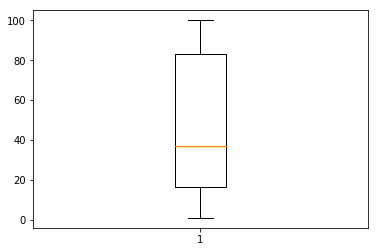

In [33]:
plt.boxplot(venue_count_neighbourhood['Venue'])
venue_count_neighbourhood.describe()

In [34]:
# Which neighbourhoods have the greatest number of venues?
top_10 = venue_count_neighbourhood.head(10)
top_10

,Neighbourhood,Venue
0,"Adelaide, King, Richmond",100
14,"Design Exchange, Toronto Dominion Centre",100
32,St. James Town,100
31,"Ryerson, Garden District",100
20,"Harbourfront East, Toronto Islands, Union Station",100
10,"Commerce Court, Victoria Hotel",100
16,"First Canadian Place, Underground city",100
33,Stn A PO Boxes 25 The Esplanade,96
7,"Chinatown, Grange Park, Kensington Market",90
9,Church and Wellesley,86


In [35]:
# Create map
map_clusters = folium.Map(location=[43.651070,-79.347015],zoom_start=13)


# Set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []
for lat, lon, neighbourhood, cluster in zip(toronto_borough_df[toronto_borough_df['Neighbourhood'].isin(top_10['Neighbourhood'])]['Latitude'], 
                                            toronto_borough_df[toronto_borough_df['Neighbourhood'].isin(top_10['Neighbourhood'])]['Longitude'], 
                                            toronto_borough_df[toronto_borough_df['Neighbourhood'].isin(top_10['Neighbourhood'])]['Neighbourhood'], 
                                            toronto_borough_df[toronto_borough_df['Neighbourhood'].isin(top_10['Neighbourhood'])]['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Which neighbourhoods offer the most diverse experiences for Toronto visitors?
- How many unique venue categories?
- How many venue categories per neighbourhood?
- Show the distribution
- Top 10
- Map it

In [36]:
# How many unique venue categories are there?
print('There are {} unique venue categories.'.format(len(toronto_borough_venues['Venue Category'].unique())))

There are 236 unique venue categories.


In [37]:
# One hot encoding
one_hot = pd.get_dummies(toronto_borough_venues[['Venue Category']], prefix='', prefix_sep='')

# Add neighbourhood column in index 0
one_hot.insert(loc=0, column='Neighbourhood', value=toronto_borough_venues['Neighbourhood'])
one_hot.head()

,Neighbourhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Harbourfront,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Harbourfront,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Harbourfront,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Harbourfront,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Harbourfront,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# Group venue category by neighbourhood
venues_by_category = one_hot.groupby('Neighbourhood').sum(axis=0).reset_index()
venues_by_category.head()

,Neighbourhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,"Adelaide, King, Richmond",0,0,0,0,0,0,0,2,0,...,0,0,0,2,0,0,1,0,1,0
1,Berczy Park,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,"Brockton, Exhibition Place, Parkdale Village",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Business Reply Mail Processing Centre 969 Eastern,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",0,1,1,1,2,3,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# Add a total column 
venues_by_category.loc[:,'Total'] = venues_by_category.loc[:, 'Afghan Restaurant':'Yoga Studio'].gt(0).sum(axis=1)
venues_by_category.head()

,Neighbourhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio,Total
0,"Adelaide, King, Richmond",0,0,0,0,0,0,0,2,0,...,0,0,2,0,0,1,0,1,0,63
1,Berczy Park,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,45
2,"Brockton, Exhibition Place, Parkdale Village",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,20
3,Business Reply Mail Processing Centre 969 Eastern,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,16
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",0,1,1,1,2,3,2,0,0,...,0,0,0,0,0,0,0,0,0,14


In [40]:
# How many venue categories for each neighbourhood?
venue_category_by_neighbourhood = venues_by_category[['Neighbourhood', 'Total']].sort_values(by=['Total'], ascending=False)
venue_category_by_neighbourhood

,Neighbourhood,Total
31,"Ryerson, Garden District",65
0,"Adelaide, King, Richmond",63
33,Stn A PO Boxes 25 The Esplanade,59
20,"Harbourfront East, Toronto Islands, Union Station",59
32,St. James Town,58
9,Church and Wellesley,58
16,"First Canadian Place, Underground city",54
7,"Chinatown, Grange Park, Kensington Market",53
10,"Commerce Court, Victoria Hotel",52
14,"Design Exchange, Toronto Dominion Centre",49


,Total
count,39.000000
mean,29.051282
std,19.999933
min,1.000000
25%,14.000000
50%,26.000000
75%,48.000000
max,65.000000


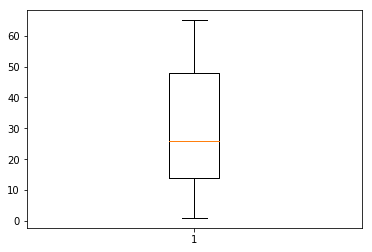

In [42]:
plt.boxplot(venue_category_by_neighbourhood['Total'])
venue_category_by_neighbourhood.describe()

In [43]:
# Which neighbourhoods have the greatest number of venue categories?
top_10 = venue_category_by_neighbourhood.head(10)
top_10

,Neighbourhood,Total
31,"Ryerson, Garden District",65
0,"Adelaide, King, Richmond",63
33,Stn A PO Boxes 25 The Esplanade,59
20,"Harbourfront East, Toronto Islands, Union Station",59
32,St. James Town,58
9,Church and Wellesley,58
16,"First Canadian Place, Underground city",54
7,"Chinatown, Grange Park, Kensington Market",53
10,"Commerce Court, Victoria Hotel",52
14,"Design Exchange, Toronto Dominion Centre",49


In [44]:
# Create map
map_clusters = folium.Map(location=[43.651070,-79.347015],zoom_start=13)


# Set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []
for lat, lon, neighbourhood, cluster in zip(toronto_borough_df[toronto_borough_df['Neighbourhood'].isin(top_10['Neighbourhood'])]['Latitude'], 
                                            toronto_borough_df[toronto_borough_df['Neighbourhood'].isin(top_10['Neighbourhood'])]['Longitude'], 
                                            toronto_borough_df[toronto_borough_df['Neighbourhood'].isin(top_10['Neighbourhood'])]['Neighbourhood'], 
                                            toronto_borough_df[toronto_borough_df['Neighbourhood'].isin(top_10['Neighbourhood'])]['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Appendices

Clustering Toronto Destinations - Project Report

https://github.com/jamiemorales/project-clustering-toronto-destinations/blob/master/clustering-toronto-destinations-report.ipynb



Clustering Toronto Destinations - Project Code

https://github.com/jamiemorales/project-clustering-toronto-destinations/blob/master/clustering-toronto-destinations-code.ipynb



Clustering Toronto Destinations - Project Abstract

https://github.com/jamiemorales/project-clustering-toronto-destinations/blob/master/clustering-toronto-destinations-abstract.ipynb



Clustering Toronto Destinations - Project Repo

https://github.com/jamiemorales/project-clustering-toronto-destinations

--------------------------------------------------------------------------------
Please cite if you use or share the content(s)/repo.

How to cite: Morales, J. 2020 Clustering Toronto Destinations Code

License: https://creativecommons.org/licenses/by-nc-nd/4.0/